In [1]:
import math
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute
from qiskit.tools.visualization import plot_histogram

qiskit.IBMQ.load_accounts()
backend = qiskit.backends.ibmq.least_busy(qiskit.IBMQ.backends(simulator=True))
shots = 100


In [2]:
def encode_bitstring(bitstring, qr, cr, inverse=False):
    """
    create a circuit for constructing the quantum superposition of the bitstring
    """
    n = math.ceil(math.log2(len(bitstring))) + 1  # number of qubits
    assert n > 2, "the length of bitstring must be at least 2"

    qc = QuantumCircuit(qr, cr)

    # the probability amplitude of the desired state
    desired_vector = np.array([0.0 for i in range(2 ** n)])  # initialize to zero
    amplitude = np.sqrt(1.0 / 2 ** (n - 1))

    for i, b in enumerate(bitstring):
        pos = i * 2
        if b == "1" or b == "M":
            pos += 1
        desired_vector[pos] = amplitude
    
    if not inverse:
        qc.initialize(desired_vector, [qr[i] for i in range(n)])
    else:
        qc.initialize(desired_vector, [qr[i] for i in range(n)]).inverse()  # invert the circuit
    

    return qc

In [3]:
BS1 = '10010010'
BS2 = '11010011'

In [4]:
n = math.ceil(math.log2(len(BS1))) + 1  # number of qubits
qr = QuantumRegister(n)
cr = ClassicalRegister(n)

For bitstring conisting of 8 bits we only need 4 qubits to encode it. $ 2^n = 3 $ to encode position and 1 to hold the info if its 0 or 1. For better explananiotion look into the next notebook "string_comparison". This "commpresion" is done by the `initialize()` function. It takes the `desired_vector` describing each postion of the bitstring by the pair of:

$ \begin{bmatrix} 0 \\ \alpha \end{bmatrix},$ for 0 and
$\begin{bmatrix} \alpha \\ 0 \end{bmatrix}  $ 1,

where $\alpha$ is the probability amplitude and sets up provided qubits array.

## BS1 measure

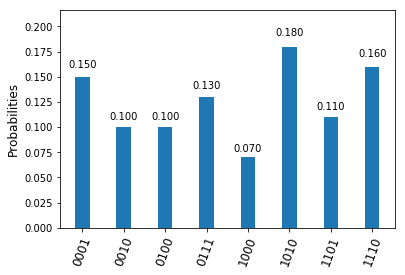

In [5]:
qc_1 = encode_bitstring(BS1, qr, cr)
qc_1.measure(qr, cr)
job = execute(qc_1 , backend=backend, shots=shots)
st = job.result().get_counts()
plot_histogram(st)


**(??? 1)**

1. Sending this curcit, that encodes a bit string, to the quantum chip gives us results how many times the specific state ("compressed") was messured and finally the probability that it exists.

2. How we understand the eg. the state `0001` and its probability? Does it still directly describes us a first postion in a bit string (000) with 1 as data?

3. How to decode the string from the states above?


## BS1_inverted measure

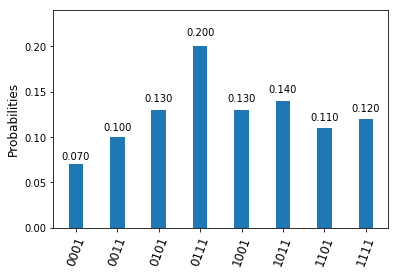

In [6]:
qc_1i = encode_bitstring(BS1, qr, cr, True)
qc_1i.measure(qr, cr)
job = execute(qc_1i , backend=backend, shots=shots)
st = job.result().get_counts()
plot_histogram(st)

## Comparing the BS1 with BS1_inverted

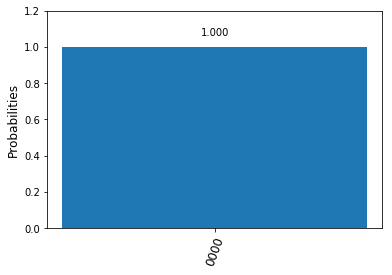

In [7]:
qc_1 = encode_bitstring(BS1, qr, cr)
qc_1.barrier(qr)
qc_1i = encode_bitstring(BS1, qr, cr, True)
qc_1i.measure(qr, cr)
qc_comb = qc_1 + qc_1i
job = execute(qc_comb , backend=backend, shots=shots)
st = job.result().get_counts()
plot_histogram(st)

**(??? 2)**

1.0 for the state 0000 and 0.0 probability for the other states means that the bits are the same. Why?

## Comparing the BS1 with BS2_inverted

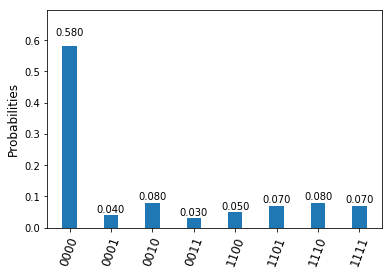

In [9]:
qc_1 = encode_bitstring(BS1, qr, cr)
qc_1.barrier(qr)
qc_2i = encode_bitstring(BS2, qr, cr, True)
qc_2i.measure(qr, cr)
qc_comb = qc_1 + qc_2i
job = execute(qc_comb , backend=backend, shots=shots)
st = job.result().get_counts()
plot_histogram(st)

**(??? 3)**

By looking only on state 0000 we get information how simmilar are the two bitstrings. (but why only 0000 state?)